<a href="https://colab.research.google.com/github/bchanyoo/NLP/blob/main/NLP%20Wikidocs_AutomaticDifferentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [5]:
# 2 * w**2 + 5라는 식을 세우고 미분하기.

w = tf.Variable(2.)

def f(w):
  y = w**2
  z = 2*y + 5
  return z

In [4]:
# tape_gradient()는 자동 미분 기능을 수행함

with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


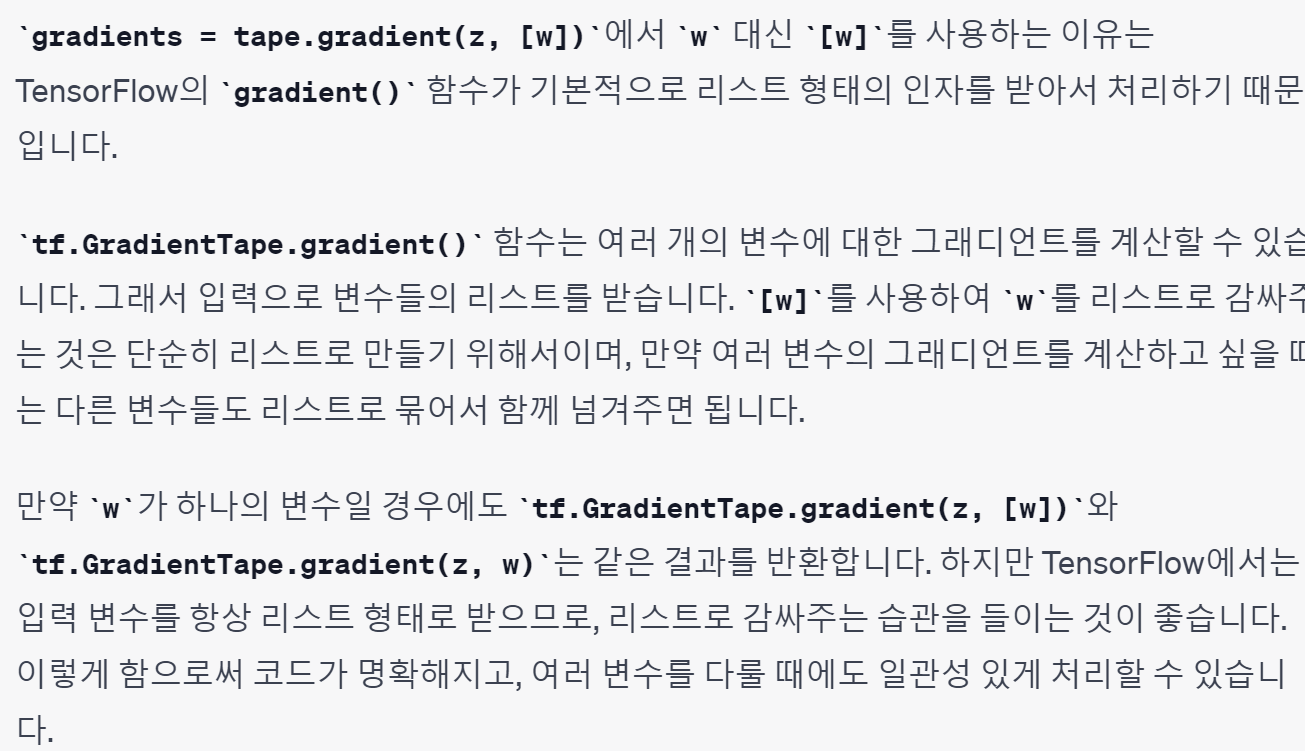

In [6]:
# Linear Regression 구현해보기.
# 학습될 가중치 변수 선언하기.

w = tf.Variable(4.0)
b = tf.Variable(1.0)

In [7]:
# 가설을 함수로 저의하기

def hypothesis(x):
  return w*x+b

In [8]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [15]:
#평균 제곱 오차를 손실 함수로 정의하기

def mse_loss(y_pred, y):
  # 두 차이값을 제곱하여 평균 구하기
  return tf.reduce_mean(tf.square(y_pred - y))

In [10]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] #점수

In [12]:
#옵티마이저는 경사 하강법을 사용.
optimizer = tf.optimizers.SGD(0.01)

In [16]:
for i in range(301): #300번에 걸쳐 경사하강법 수행
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 x에 대한 예측값을 y_pred
    y_pred = hypothesis(x)

    #평균 제곱 오차 계산
    cost = mse_loss(y_pred, y)

    #손실 함수에 대한 파라미터의 미분값 계산
    gradients = tape.gradient(cost, [w, b])

    #파라미터 업데이트
    optimizer.apply_gradients(zip(gradients, [w, b]))

    if i % 10 == 0:
      print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210659
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198742
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168355
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [17]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


In [18]:
# Keras로 구현하는 선형 회귀.

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [20]:
x = [1,2,3,4,5,6,7,8,9] #공부시간
y = [11,22,33,44,53,66,77,87,95] #시험성적

model = Sequential()

#출력인 y의 차원은 1, 입력 x의 차원(input_dim)은 1
#선형회귀이므로 activation 은 'linear'
model.add(Dense(1, input_dim=1, activation = 'linear'))

#경사 하강법, 학습률을 0.01로 정의
sgd = optimizers.SGD(lr = 0.01)

# 손실함수는 MSE 사용
model.compile(optimizer = sgd, loss = 'mse', metrics = ['mse'])

# 에포크 300번 돌리기
model.fit(x, y, epochs = 300)

Epoch 1/300
1/1 [==============================] - 1s 543ms/step - loss: 2655.3157 - mse: 2655.3157
Epoch 2/300
1/1 [==============================] - 0s 11ms/step - loss: 327.7150 - mse: 327.7150
Epoch 3/300
1/1 [==============================] - 0s 12ms/step - loss: 41.3206 - mse: 41.3206
Epoch 4/300
1/1 [==============================] - 0s 11ms/step - loss: 6.0814 - mse: 6.0814
Epoch 5/300
1/1 [==============================] - 0s 13ms/step - loss: 1.7450 - mse: 1.7450
Epoch 6/300
1/1 [==============================] - 0s 12ms/step - loss: 1.2108 - mse: 1.2108
Epoch 7/300
1/1 [==============================] - 0s 11ms/step - loss: 1.1446 - mse: 1.1446
Epoch 8/300
1/1 [==============================] - 0s 12ms/step - loss: 1.1359 - mse: 1.1359
Epoch 9/300
1/1 [==============================] - 0s 11ms/step - loss: 1.1343 - mse: 1.1343
Epoch 10/300
1/1 [==============================] - 0s 12ms/step - loss: 1.1335 - mse: 1.1335
Epoch 11/300
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 53ms/step


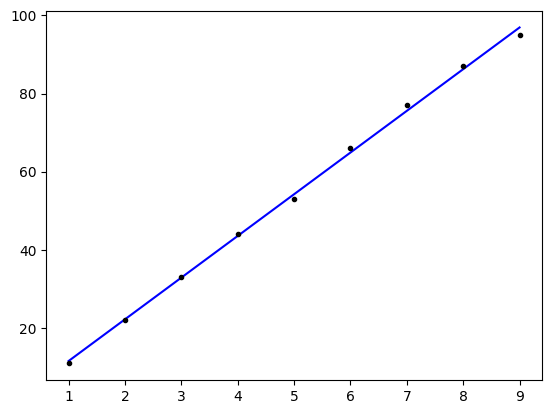

In [22]:
plt.plot(x, model.predict(x), 'b', x,y, 'k.')
#각 점은 실제값, 직선은 실제값으로부터 오차를 최소화하는 w와 b의 값을 가지는 직선.

In [23]:
#9.5시간 공부 예측치 구해보기
print(model.predict([9.5]))

1/1 [==============================] - 0s 79ms/step
[[102.206215]]
